# Exploratory Data Analysis: Dades_Comptad

This notebook performs a comprehensive EDA on the full water meter dataset.

**Dataset:** `Dades_Comptadors_anonymized_v2.csv`

**Dataset Structure:**
- **POLIZA_SUMINISTRO**: Unique identifier for the water supply contract
- **FECHA**: Date of consumption record (YYYY-MM-DD format)
- **CONSUMO_REAL**: Real water consumption (L/day)
- **SECCIO_CENSAL**: Census section code (geographic area)
- **US_AIGUA_GEST**: Water usage type (D=domestic, C=commercial, M=municipal)
- **NUM_MUN_SGAB**: Municipality code (00=Barcelona, 10=L'Hospitalet, 25=Viladecans, 47=Santa Coloma)
- **NUM_DTE_MUNI**: District number within municipality
- **NUM_COMPLET**: Complete unique identifier for the smart meter
- **DATA_INST_COMP**: Meter installation date
- **MARCA_COMP**: Meter brand/manufacturer
- **CODI_MODEL**: Model code
- **DIAM_COMP**: Meter diameter (mm)

**Note:** All analysis is performed locally in this notebook, no files are saved externally.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 8)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)


## 1. Data Loading and Basic Information


In [2]:
# Load the dataset
data_path = Path("data/Dades_Comptadors_anonymized_v2.csv")

print(f"Loading dataset from: {data_path}")
print(f"File exists: {data_path.exists()}\n")

# Load data
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}\n")

print("Column names:")
print(df.columns.tolist())


Loading dataset from: data\Dades_Comptadors_anonymized_v2.csv
File exists: True

Dataset shape: (17112709, 12)
Rows: 17,112,709
Columns: 12

Column names:
['POLIZA_SUMINISTRO', 'FECHA', 'CONSUMO_REAL', 'SECCIO_CENSAL', 'US_AIGUA_GEST', 'NUM_MUN_SGAB', 'NUM_DTE_MUNI', 'NUM_COMPLET', 'DATA_INST_COMP', 'MARCA_COMP', 'CODI_MODEL', 'DIAM_COMP']


In [3]:
# Display first few rows
df.head(10)


,POLIZA_SUMINISTRO,FECHA,CONSUMO_REAL,SECCIO_CENSAL,US_AIGUA_GEST,NUM_MUN_SGAB,NUM_DTE_MUNI,NUM_COMPLET,DATA_INST_COMP,MARCA_COMP,CODI_MODEL,DIAM_COMP
0,VECWAVDUULZDSBOP,2021-01-01,1758,801903025,C,0,3,D15TD031058M,2016-04-25,ITR,23,30
1,VECWAVDUULZDSBOP,2021-01-02,1854,801903025,C,0,3,D15TD031058M,2016-04-25,ITR,23,30
2,VECWAVDUULZDSBOP,2021-01-03,1885,801903025,C,0,3,D15TD031058M,2016-04-25,ITR,23,30
3,VECWAVDUULZDSBOP,2021-01-04,5676,801903025,C,0,3,D15TD031058M,2016-04-25,ITR,23,30
4,VECWAVDUULZDSBOP,2021-01-05,4456,801903025,C,0,3,D15TD031058M,2016-04-25,ITR,23,30
5,VECWAVDUULZDSBOP,2021-01-06,2061,801903025,C,0,3,D15TD031058M,2016-04-25,ITR,23,30
6,VECWAVDUULZDSBOP,2021-01-07,5125,801903025,C,0,3,D15TD031058M,2016-04-25,ITR,23,30
7,VECWAVDUULZDSBOP,2021-01-08,5390,801903025,C,0,3,D15TD031058M,2016-04-25,ITR,23,30
8,VECWAVDUULZDSBOP,2021-01-09,2428,801903025,C,0,3,D15TD031058M,2016-04-25,ITR,23,30
9,VECWAVDUULZDSBOP,2021-01-10,3088,801903025,C,0,3,D15TD031058M,2016-04-25,ITR,23,30


In [4]:
# Data types and basic info
print("Data types:")
print(df.dtypes)
print("\n" + "="*80 + "\n")

df.info()


Data types:
POLIZA_SUMINISTRO    object
FECHA                object
CONSUMO_REAL          int64
SECCIO_CENSAL         int64
US_AIGUA_GEST        object
NUM_MUN_SGAB          int64
NUM_DTE_MUNI          int64
NUM_COMPLET          object
DATA_INST_COMP       object
MARCA_COMP           object
CODI_MODEL            int64
DIAM_COMP             int64
dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17112709 entries, 0 to 17112708
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   POLIZA_SUMINISTRO  object
 1   FECHA              object
 2   CONSUMO_REAL       int64 
 3   SECCIO_CENSAL      int64 
 4   US_AIGUA_GEST      object
 5   NUM_MUN_SGAB       int64 
 6   NUM_DTE_MUNI       int64 
 7   NUM_COMPLET        object
 8   DATA_INST_COMP     object
 9   MARCA_COMP         object
 10  CODI_MODEL         int64 
 11  DIAM_COMP          int64 
dtypes: int64(6), object(6)
memory usage: 1.5+ GB


## 2. Missing Values Analysis


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percent.values
}).sort_values('Missing Count', ascending=False)

print("Missing Values Summary:")
print("="*80)
print(missing_df.to_string(index=False))

# Visualize missing values
plt.figure(figsize=(12, 6))
missing_df_plot = missing_df[missing_df['Missing Count'] > 0]
if len(missing_df_plot) > 0:
    plt.barh(missing_df_plot['Column'], missing_df_plot['Missing Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ No missing values found in the dataset!")


Missing Values Summary:
           Column  Missing Count  Missing Percentage
POLIZA_SUMINISTRO              0                0.00
            FECHA              0                0.00
     CONSUMO_REAL              0                0.00
    SECCIO_CENSAL              0                0.00
    US_AIGUA_GEST              0                0.00
     NUM_MUN_SGAB              0                0.00
     NUM_DTE_MUNI              0                0.00
      NUM_COMPLET              0                0.00
   DATA_INST_COMP              0                0.00
       MARCA_COMP              0                0.00
       CODI_MODEL              0                0.00
        DIAM_COMP              0                0.00

✓ No missing values found in the dataset!


<Figure size 1200x600 with 0 Axes>

In [6]:
# Convert date columns to datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['DATA_INST_COMP'] = pd.to_datetime(df['DATA_INST_COMP'], errors='coerce')

# Extract temporal features
df['YEAR'] = df['FECHA'].dt.year
df['MONTH'] = df['FECHA'].dt.month
df['DAY'] = df['FECHA'].dt.day
df['DAY_OF_WEEK'] = df['FECHA'].dt.dayofweek
df['WEEK_OF_YEAR'] = df['FECHA'].dt.isocalendar().week
df['QUARTER'] = df['FECHA'].dt.quarter

# Calculate meter age (years since installation)
df['METER_AGE'] = (df['FECHA'] - df['DATA_INST_COMP']).dt.days / 365.25

print("Date conversions completed!")
print(f"Date range: {df['FECHA'].min()} to {df['FECHA'].max()}")
print(f"Total unique dates: {df['FECHA'].nunique()}")


Date conversions completed!
Date range: 2021-01-01 00:00:00 to 2024-12-31 00:00:00
Total unique dates: 1458


## 4. Descriptive Statistics


In [7]:
# Statistical summary for numerical columns
numerical_cols = ['CONSUMO_REAL', 'DIAM_COMP', 'METER_AGE']
print("Descriptive Statistics - Numerical Variables:")
print("="*80)
print(df[numerical_cols].describe())


Descriptive Statistics - Numerical Variables:
       CONSUMO_REAL   DIAM_COMP   METER_AGE
count   17112709.00 17112709.00 17112709.00
mean         323.47       15.17        5.92
std         1538.66        1.82        1.85
min            0.00       15.00        0.01
25%           90.00       15.00        4.74
50%          194.00       15.00        6.00
75%          329.00       15.00        7.27
max       593640.00       65.00       13.96


In [8]:
# Statistical summary for categorical columns
categorical_cols = ['US_AIGUA_GEST', 'NUM_MUN_SGAB', 'NUM_DTE_MUNI', 'MARCA_COMP', 'CODI_MODEL']

print("Categorical Variables Summary:")
print("="*80)

for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Top 10 values:")
        print(df[col].value_counts().head(10).to_string())
        print("-"*80)


Categorical Variables Summary:

US_AIGUA_GEST:
  Unique values: 4
  Top 10 values:
US_AIGUA_GEST
D    15124395
C     1575889
I      324079
A       88346
--------------------------------------------------------------------------------

NUM_MUN_SGAB:
  Unique values: 4
  Top 10 values:
NUM_MUN_SGAB
0     10069837
10     6250829
25      541959
47      250084
--------------------------------------------------------------------------------

NUM_DTE_MUNI:
  Unique values: 9
  Top 10 values:
NUM_DTE_MUNI
3     3378640
1     3141831
6     2676711
2     2519916
10    1781972
5     1501011
4     1333529
7      770377
9        8722
--------------------------------------------------------------------------------

MARCA_COMP:
  Unique values: 4
  Top 10 values:
MARCA_COMP
ITR    11127427
SPL     3276069
ZAR     2360952
IBE      348261
--------------------------------------------------------------------------------

CODI_MODEL:
  Unique values: 24
  Top 10 values:
CODI_MODEL
31    9935058
2     1945

## 5. Temporal Analysis


In [9]:
# Temporal distribution
print("Temporal Distribution:")
print("="*80)
print(f"Year: {df['YEAR'].value_counts().sort_index().to_dict()}")
print(f"\nMonth distribution:")
print(df['MONTH'].value_counts().sort_index())
print(f"\nDay of week distribution (0=Monday, 6=Sunday):")
print(df['DAY_OF_WEEK'].value_counts().sort_index())


Temporal Distribution:
Year: {2021: 4271129, 2022: 4268426, 2023: 4301647, 2024: 4271507}

Month distribution:
MONTH
1     1411821
2     1327177
3     1454008
4     1409120
5     1456335
6     1413641
7     1426876
8     1461329
9     1415045
10    1462272
11    1413676
12    1461409
Name: count, dtype: int64

Day of week distribution (0=Monday, 6=Sunday):
DAY_OF_WEEK
0    2459573
1    2459932
2    2448292
3    2436553
4    2436226
5    2434760
6    2437373
Name: count, dtype: int64


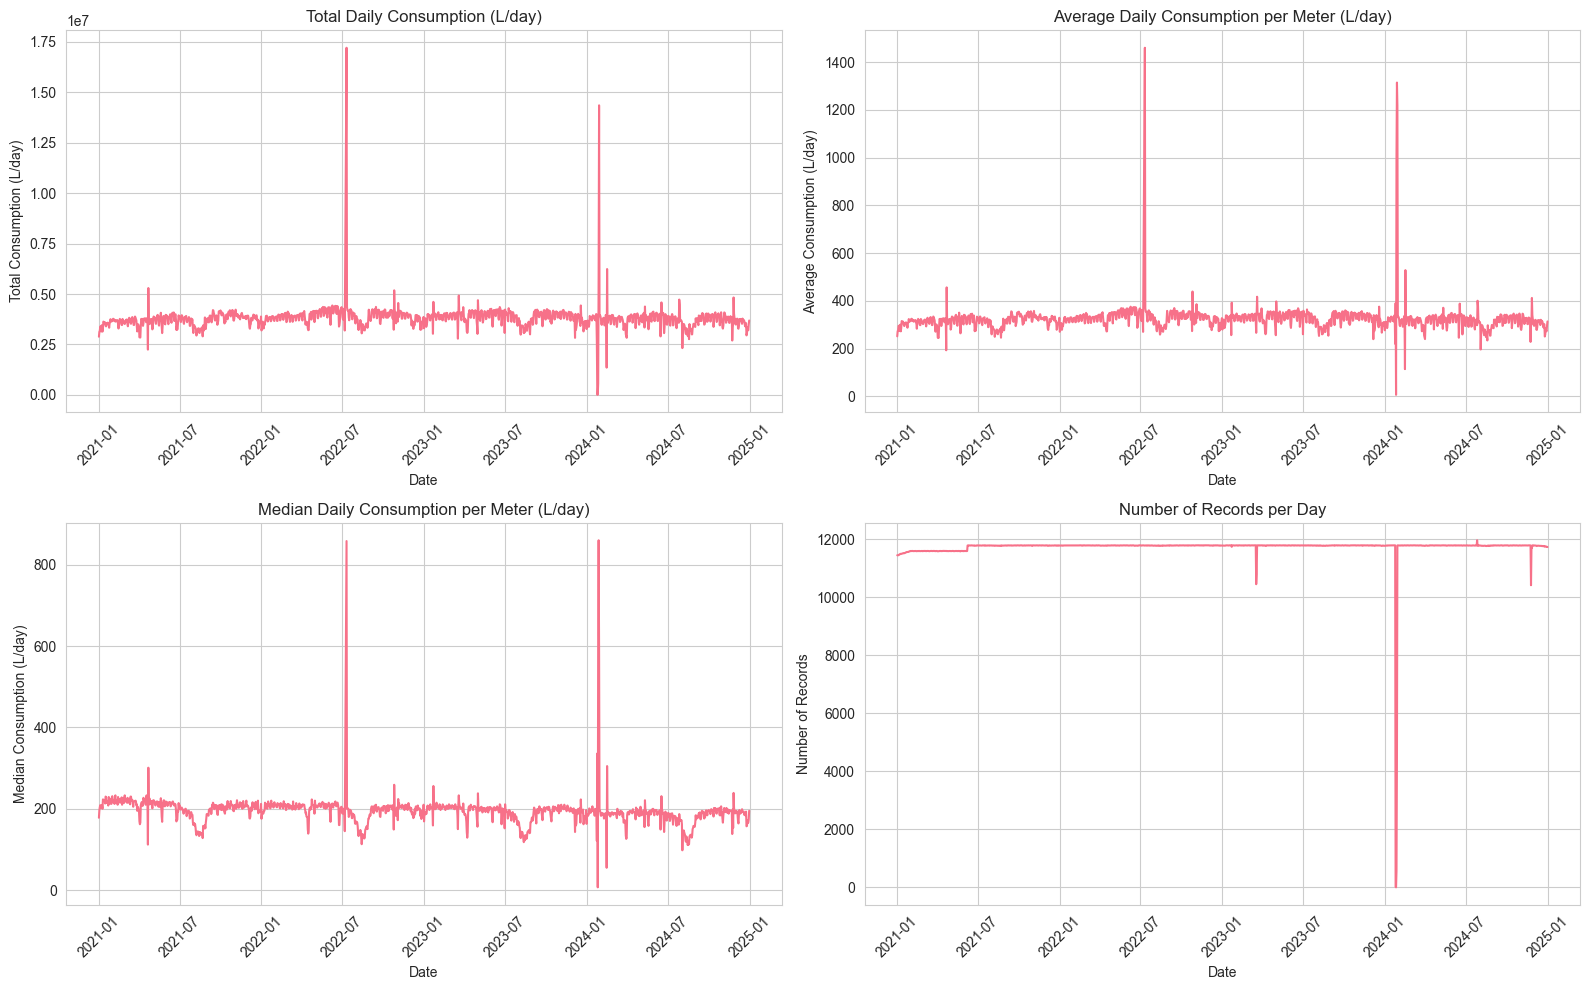

In [10]:
# Daily consumption over time
daily_consumption = df.groupby('FECHA')['CONSUMO_REAL'].agg(['sum', 'mean', 'median', 'count']).reset_index()

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Total daily consumption
axes[0, 0].plot(daily_consumption['FECHA'], daily_consumption['sum'])
axes[0, 0].set_title('Total Daily Consumption (L/day)')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Total Consumption (L/day)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Average daily consumption
axes[0, 1].plot(daily_consumption['FECHA'], daily_consumption['mean'])
axes[0, 1].set_title('Average Daily Consumption per Meter (L/day)')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Average Consumption (L/day)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Median daily consumption
axes[1, 0].plot(daily_consumption['FECHA'], daily_consumption['median'])
axes[1, 0].set_title('Median Daily Consumption per Meter (L/day)')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Median Consumption (L/day)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Number of records per day
axes[1, 1].plot(daily_consumption['FECHA'], daily_consumption['count'])
axes[1, 1].set_title('Number of Records per Day')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Number of Records')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


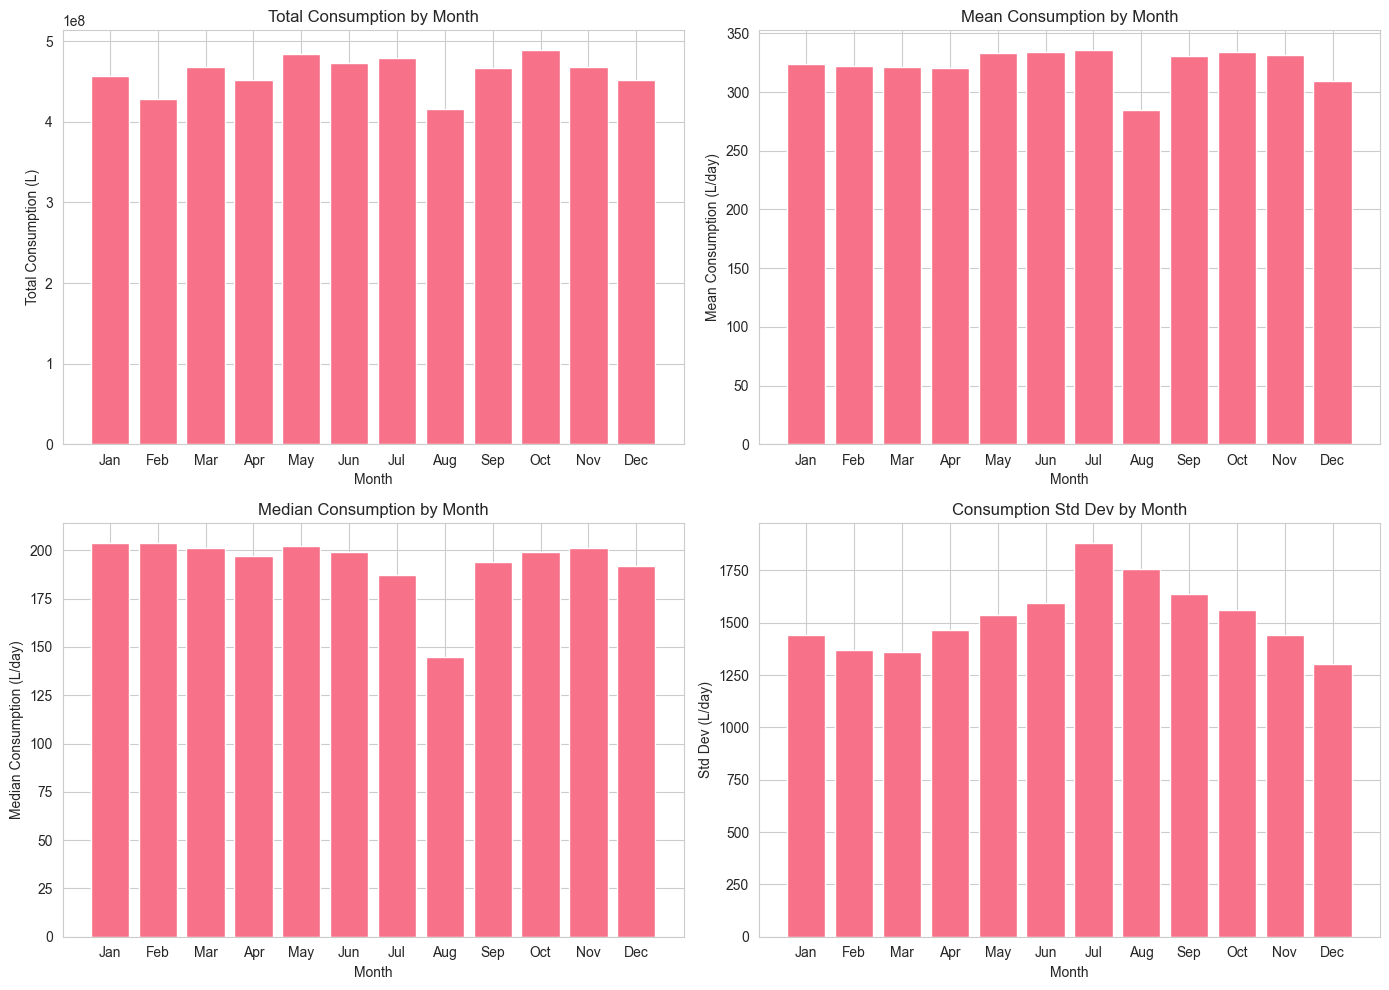

In [11]:
# Monthly consumption patterns
monthly_stats = df.groupby('MONTH')['CONSUMO_REAL'].agg(['sum', 'mean', 'median', 'std']).reset_index()
monthly_stats.columns = ['Month', 'Total', 'Mean', 'Median', 'Std']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Total consumption by month
axes[0, 0].bar(monthly_stats['Month'], monthly_stats['Total'])
axes[0, 0].set_title('Total Consumption by Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Total Consumption (L)')
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Mean consumption by month
axes[0, 1].bar(monthly_stats['Month'], monthly_stats['Mean'])
axes[0, 1].set_title('Mean Consumption by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Mean Consumption (L/day)')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Median consumption by month
axes[1, 0].bar(monthly_stats['Month'], monthly_stats['Median'])
axes[1, 0].set_title('Median Consumption by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Median Consumption (L/day)')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Standard deviation by month
axes[1, 1].bar(monthly_stats['Month'], monthly_stats['Std'])
axes[1, 1].set_title('Consumption Std Dev by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Std Dev (L/day)')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()


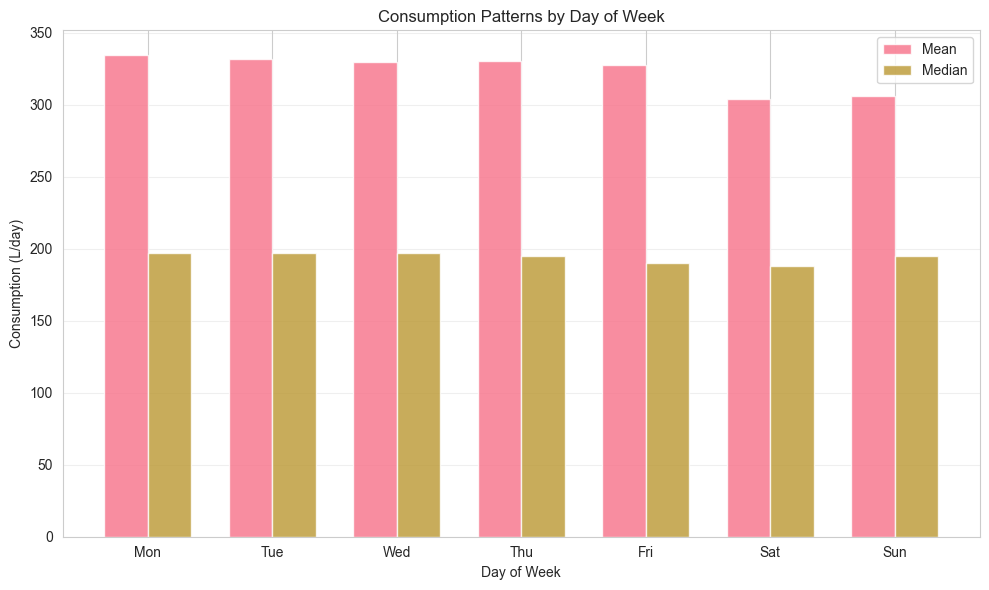

In [12]:
# Day of week patterns
dow_stats = df.groupby('DAY_OF_WEEK')['CONSUMO_REAL'].agg(['mean', 'median']).reset_index()
dow_stats['Day'] = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(dow_stats))
width = 0.35

ax.bar(x - width/2, dow_stats['mean'], width, label='Mean', alpha=0.8)
ax.bar(x + width/2, dow_stats['median'], width, label='Median', alpha=0.8)
ax.set_xlabel('Day of Week')
ax.set_ylabel('Consumption (L/day)')
ax.set_title('Consumption Patterns by Day of Week')
ax.set_xticks(x)
ax.set_xticklabels(dow_stats['Day'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 6. Consumption Analysis


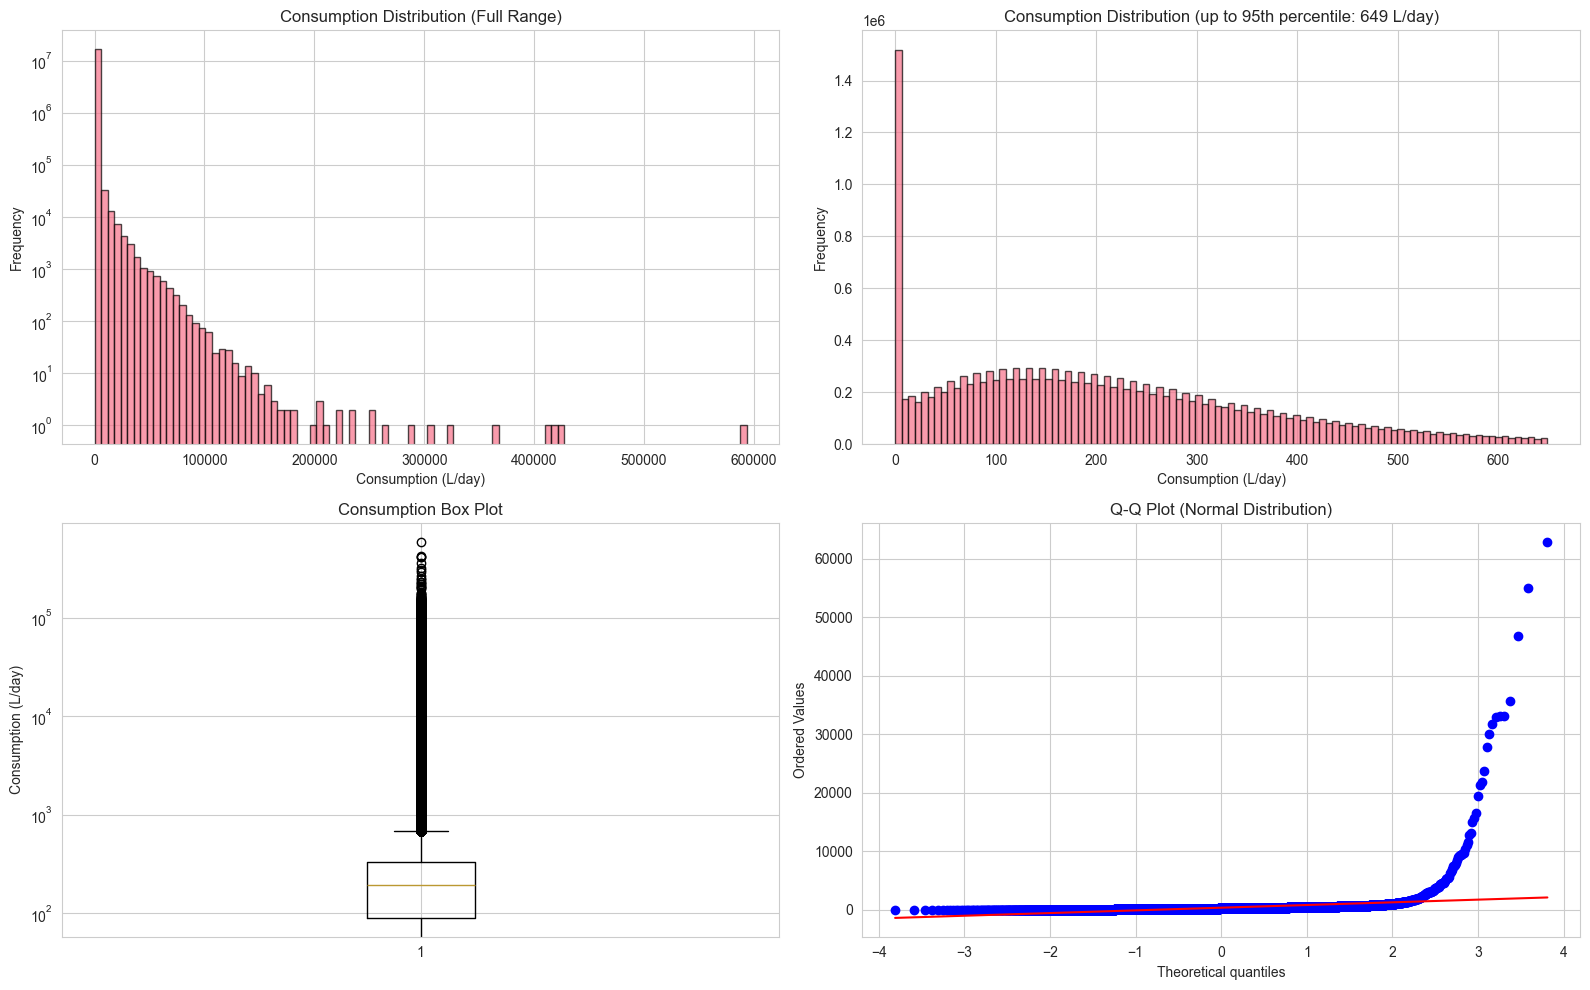

Consumption Statistics:
  Min: 0.00 L/day
  25th percentile: 90.00 L/day
  Median: 194.00 L/day
  75th percentile: 329.00 L/day
  95th percentile: 649.00 L/day
  99th percentile: 1987.00 L/day
  Max: 593640.00 L/day
  Mean: 323.47 L/day
  Std: 1538.66 L/day
  Skewness: 41.62
  Kurtosis: 4479.57


In [13]:
# Consumption distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Histogram
axes[0, 0].hist(df['CONSUMO_REAL'], bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Consumption Distribution (Full Range)')
axes[0, 0].set_xlabel('Consumption (L/day)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_yscale('log')

# Histogram (zoomed to see distribution better)
q95 = df['CONSUMO_REAL'].quantile(0.95)
df_filtered = df[df['CONSUMO_REAL'] <= q95]
axes[0, 1].hist(df_filtered['CONSUMO_REAL'], bins=100, edgecolor='black', alpha=0.7)
axes[0, 1].set_title(f'Consumption Distribution (up to 95th percentile: {q95:.0f} L/day)')
axes[0, 1].set_xlabel('Consumption (L/day)')
axes[0, 1].set_ylabel('Frequency')

# Box plot
axes[1, 0].boxplot(df['CONSUMO_REAL'], vert=True)
axes[1, 0].set_title('Consumption Box Plot')
axes[1, 0].set_ylabel('Consumption (L/day)')
axes[1, 0].set_yscale('log')

# Q-Q plot (quantile-quantile plot)
from scipy import stats
stats.probplot(df['CONSUMO_REAL'].sample(min(10000, len(df))), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normal Distribution)')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

print("Consumption Statistics:")
print(f"  Min: {df['CONSUMO_REAL'].min():.2f} L/day")
print(f"  25th percentile: {df['CONSUMO_REAL'].quantile(0.25):.2f} L/day")
print(f"  Median: {df['CONSUMO_REAL'].median():.2f} L/day")
print(f"  75th percentile: {df['CONSUMO_REAL'].quantile(0.75):.2f} L/day")
print(f"  95th percentile: {df['CONSUMO_REAL'].quantile(0.95):.2f} L/day")
print(f"  99th percentile: {df['CONSUMO_REAL'].quantile(0.99):.2f} L/day")
print(f"  Max: {df['CONSUMO_REAL'].max():.2f} L/day")
print(f"  Mean: {df['CONSUMO_REAL'].mean():.2f} L/day")
print(f"  Std: {df['CONSUMO_REAL'].std():.2f} L/day")
print(f"  Skewness: {df['CONSUMO_REAL'].skew():.2f}")
print(f"  Kurtosis: {df['CONSUMO_REAL'].kurtosis():.2f}")


Total unique meters: 11,797

Per-Meter Consumption Statistics:
       Mean_Consumption  Median_Consumption  Std_Consumption  Min_Consumption  \
count          11797.00            11797.00         11797.00         11797.00   
mean             323.34              304.54           212.95             9.29   
std             1334.08             1327.12           733.91           146.63   
min                0.35                0.00             0.70             0.00   
25%              135.43              120.00            89.68             0.00   
50%              212.87              201.00           126.85             0.00   
75%              311.94              298.50           179.44             0.00   
max            64110.30            59485.00         34679.72          7407.00   

       Max_Consumption  Record_Count  
count         11797.00      11797.00  
mean           2946.54       1450.60  
std           11048.67         20.79  
min               5.00       1172.00  
25%         

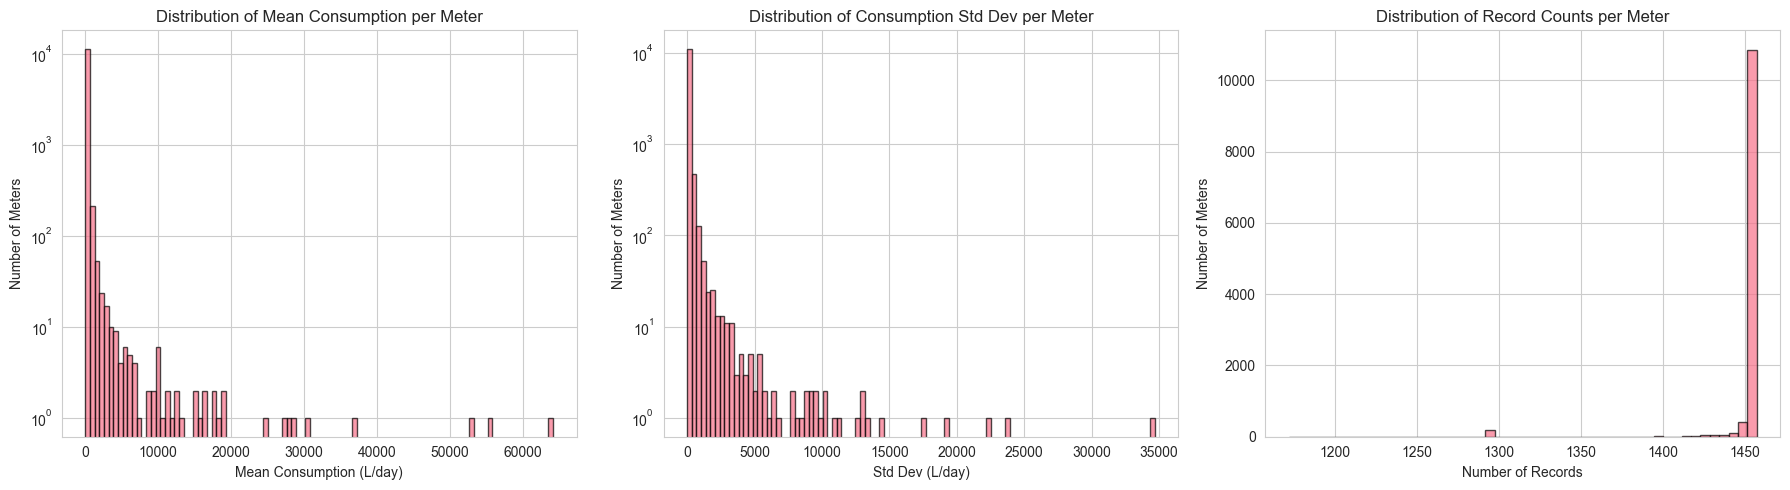

In [14]:
# Per-meter consumption statistics
meter_stats = df.groupby('POLIZA_SUMINISTRO')['CONSUMO_REAL'].agg([
    'mean', 'median', 'std', 'min', 'max', 'count'
]).reset_index()
meter_stats.columns = ['Meter_ID', 'Mean_Consumption', 'Median_Consumption', 
                       'Std_Consumption', 'Min_Consumption', 'Max_Consumption', 'Record_Count']

print(f"Total unique meters: {len(meter_stats):,}")
print("\nPer-Meter Consumption Statistics:")
print(meter_stats.describe())

# Distribution of mean consumption per meter
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(meter_stats['Mean_Consumption'], bins=100, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Mean Consumption per Meter')
axes[0].set_xlabel('Mean Consumption (L/day)')
axes[0].set_ylabel('Number of Meters')
axes[0].set_yscale('log')

axes[1].hist(meter_stats['Std_Consumption'].dropna(), bins=100, edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Consumption Std Dev per Meter')
axes[1].set_xlabel('Std Dev (L/day)')
axes[1].set_ylabel('Number of Meters')
axes[1].set_yscale('log')

axes[2].hist(meter_stats['Record_Count'], bins=50, edgecolor='black', alpha=0.7)
axes[2].set_title('Distribution of Record Counts per Meter')
axes[2].set_xlabel('Number of Records')
axes[2].set_ylabel('Number of Meters')

plt.tight_layout()
plt.show()


## 7. Usage Type Analysis (US_AIGUA_GEST)


Usage Type Distribution:
D: 15,124,395 records (88.38%)
C: 1,575,889 records (9.21%)
I: 324,079 records (1.89%)
A: 88,346 records (0.52%)


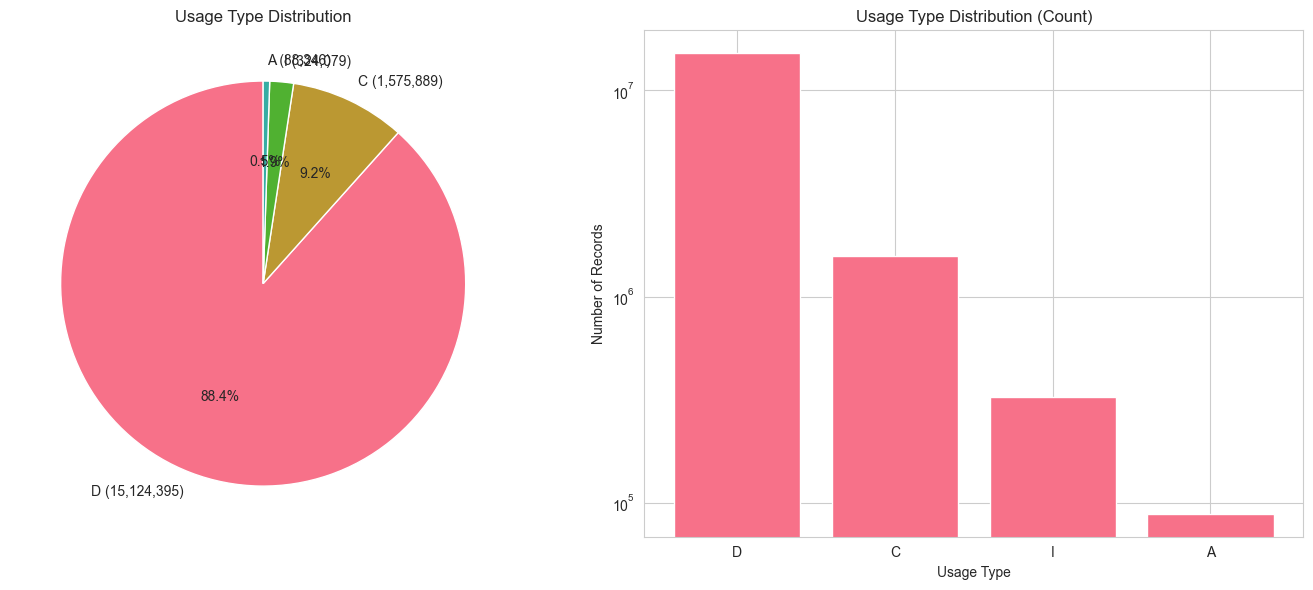


Consumption Statistics by Usage Type:
Usage_Type    Mean  Median     Std    Count
         A 2295.67  225.00 6681.29    88346
         C  340.92   95.00 1071.38  1575889
         D  240.59  200.00  277.32 15124395
         I 3569.07  373.00 9578.98   324079


In [15]:
# Usage type distribution
usage_dist = df['US_AIGUA_GEST'].value_counts()
usage_percent = (usage_dist / len(df)) * 100

print("Usage Type Distribution:")
print("="*80)
for usage_type, count in usage_dist.items():
    print(f"{usage_type}: {count:,} records ({usage_percent[usage_type]:.2f}%)")

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
axes[0].pie(usage_dist.values, labels=[f"{k} ({v:,})" for k, v in usage_dist.items()], 
            autopct='%1.1f%%', startangle=90)
axes[0].set_title('Usage Type Distribution')

# Bar chart
axes[1].bar(usage_dist.index, usage_dist.values)
axes[1].set_title('Usage Type Distribution (Count)')
axes[1].set_xlabel('Usage Type')
axes[1].set_ylabel('Number of Records')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

# Consumption by usage type
usage_consumption = df.groupby('US_AIGUA_GEST')['CONSUMO_REAL'].agg(['mean', 'median', 'std', 'count']).reset_index()
usage_consumption.columns = ['Usage_Type', 'Mean', 'Median', 'Std', 'Count']
print("\nConsumption Statistics by Usage Type:")
print(usage_consumption.to_string(index=False))


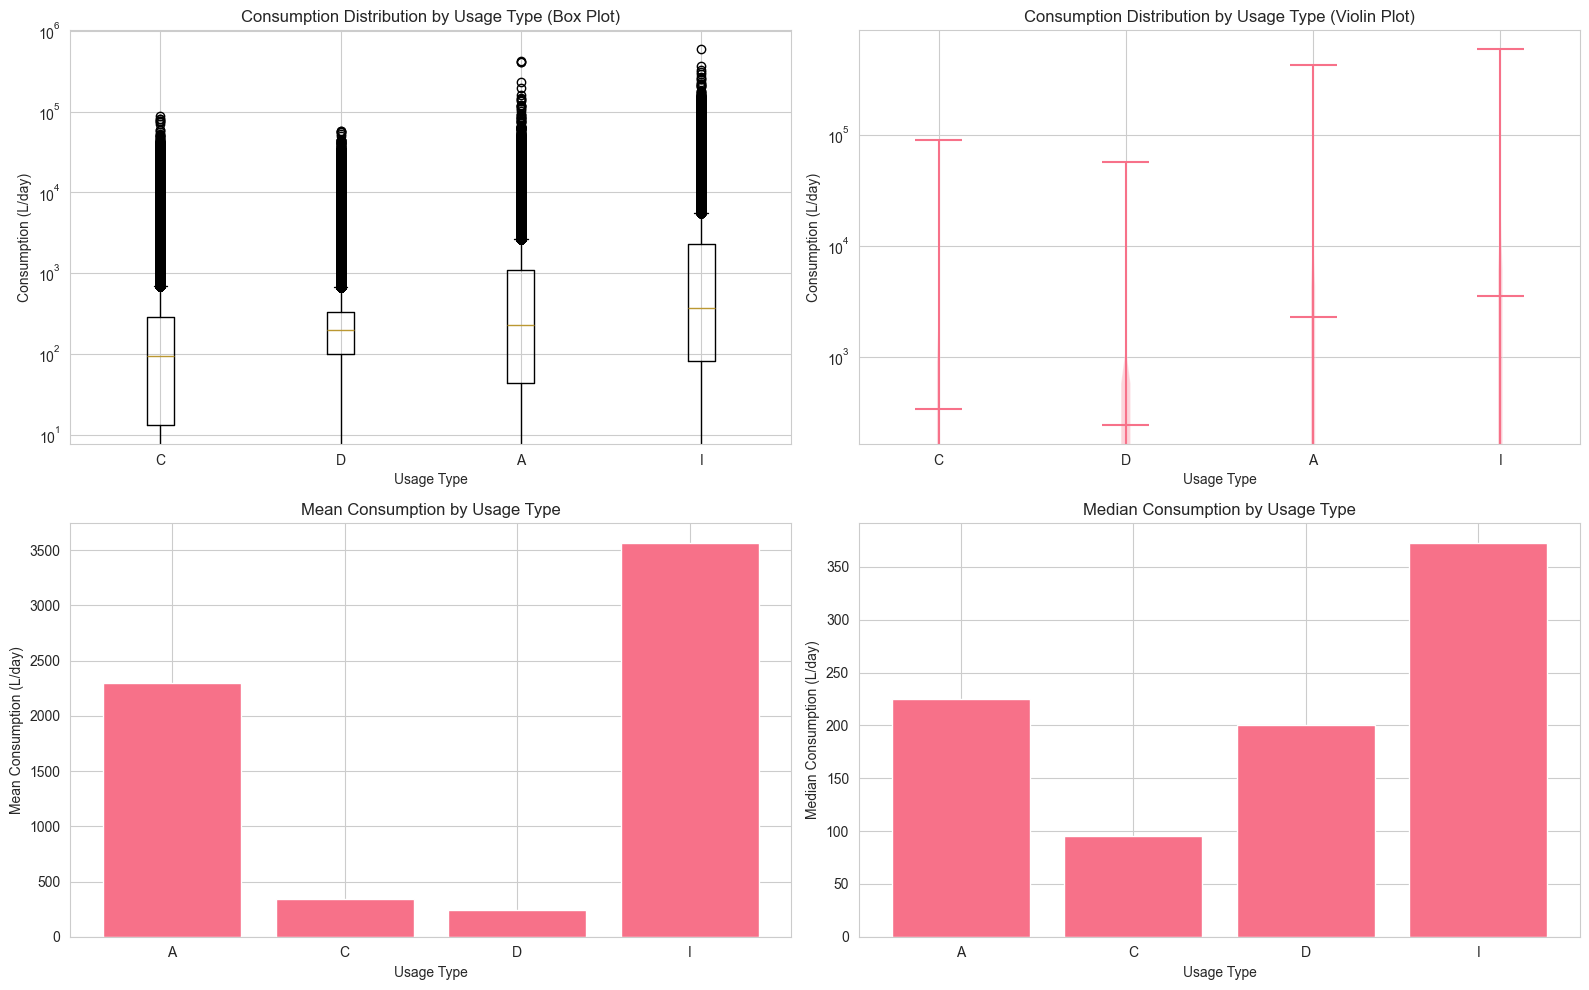

In [16]:
# Consumption distribution by usage type
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

usage_types = df['US_AIGUA_GEST'].unique()

# Box plots
for i, usage_type in enumerate(usage_types):
    data = df[df['US_AIGUA_GEST'] == usage_type]['CONSUMO_REAL']
    axes[0, 0].boxplot([data], labels=[usage_type], positions=[i])
axes[0, 0].set_title('Consumption Distribution by Usage Type (Box Plot)')
axes[0, 0].set_xlabel('Usage Type')
axes[0, 0].set_ylabel('Consumption (L/day)')
axes[0, 0].set_yscale('log')

# Violin plots
usage_data = [df[df['US_AIGUA_GEST'] == ut]['CONSUMO_REAL'].values for ut in usage_types]
parts = axes[0, 1].violinplot(usage_data, positions=range(len(usage_types)), showmeans=True)
axes[0, 1].set_xticks(range(len(usage_types)))
axes[0, 1].set_xticklabels(usage_types)
axes[0, 1].set_title('Consumption Distribution by Usage Type (Violin Plot)')
axes[0, 1].set_xlabel('Usage Type')
axes[0, 1].set_ylabel('Consumption (L/day)')
axes[0, 1].set_yscale('log')

# Mean consumption comparison
axes[1, 0].bar(usage_consumption['Usage_Type'], usage_consumption['Mean'])
axes[1, 0].set_title('Mean Consumption by Usage Type')
axes[1, 0].set_xlabel('Usage Type')
axes[1, 0].set_ylabel('Mean Consumption (L/day)')

# Median consumption comparison
axes[1, 1].bar(usage_consumption['Usage_Type'], usage_consumption['Median'])
axes[1, 1].set_title('Median Consumption by Usage Type')
axes[1, 1].set_xlabel('Usage Type')
axes[1, 1].set_ylabel('Median Consumption (L/day)')

plt.tight_layout()
plt.show()


## 8. Geographic Analysis


Municipality Distribution:
Unknown: 10,069,837 records (58.84%)
L'Hospitalet: 6,250,829 records (36.53%)
Viladecans: 541,959 records (3.17%)
Santa Coloma: 250,084 records (1.46%)


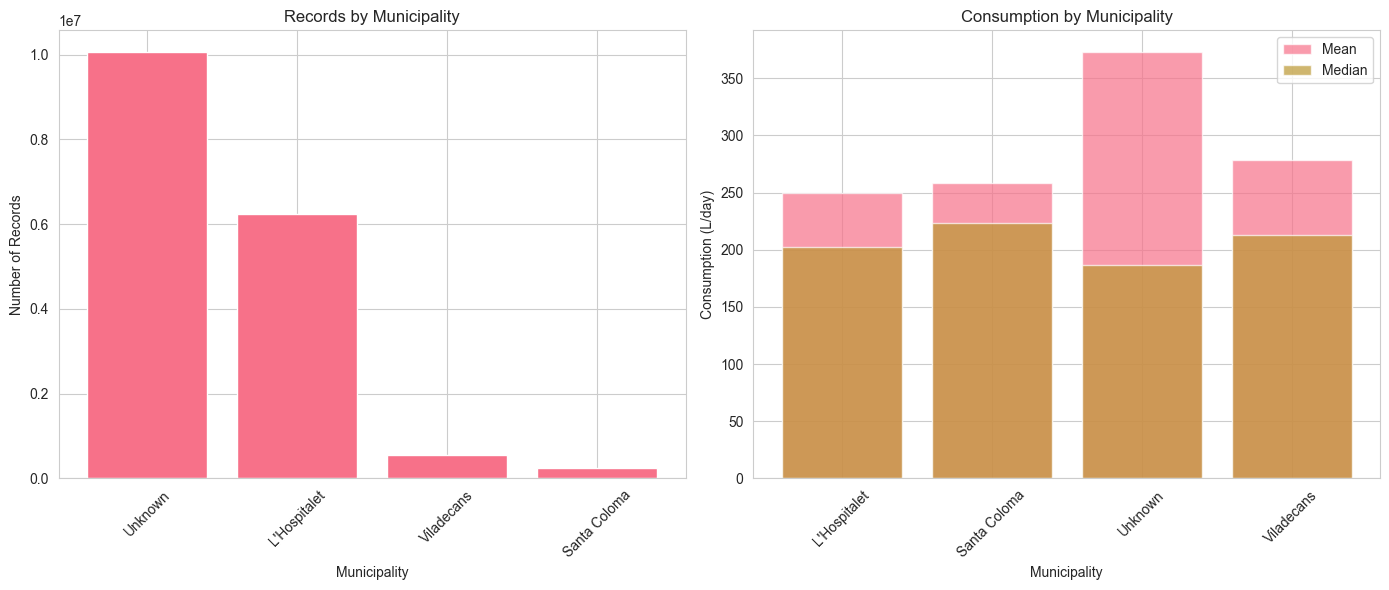


Consumption Statistics by Municipality:
                        count   mean     std  min    25%    50%    75%  \
MUNICIPALITY_NAME                                                        
L'Hospitalet       6250829.00 249.89  442.64 0.00 103.00 202.00 326.00   
Santa Coloma        250084.00 258.16  356.92 0.00 121.00 223.00 341.00   
Unknown           10069837.00 373.19 1969.06 0.00  80.00 187.00 331.00   
Viladecans          541959.00 278.55  532.93 0.00 109.00 213.00 343.00   

                        max  
MUNICIPALITY_NAME            
L'Hospitalet      162923.00  
Santa Coloma       32681.00  
Unknown           593640.00  
Viladecans         55007.00  


In [18]:
# Municipality distribution
municipality_map = {
    '00': 'Barcelona',
    '10': "L'Hospitalet",
    '25': 'Viladecans',
    '47': 'Santa Coloma'
}

df['MUNICIPALITY_NAME'] = df['NUM_MUN_SGAB'].astype(str).map(municipality_map).fillna('Unknown')

mun_dist = df['MUNICIPALITY_NAME'].value_counts()
print("Municipality Distribution:")
print("="*80)
for mun, count in mun_dist.items():
    print(f"{mun}: {count:,} records ({(count/len(df)*100):.2f}%)")

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(mun_dist.index, mun_dist.values)
axes[0].set_title('Records by Municipality')
axes[0].set_xlabel('Municipality')
axes[0].set_ylabel('Number of Records')
axes[0].tick_params(axis='x', rotation=45)

# Consumption by municipality
mun_consumption = df.groupby('MUNICIPALITY_NAME')['CONSUMO_REAL'].agg(['mean', 'median']).reset_index()
# Flatten column names (MultiIndex becomes simple column names)
mun_consumption.columns = ['MUNICIPALITY_NAME', 'Mean', 'Median']
axes[1].bar(mun_consumption['MUNICIPALITY_NAME'], mun_consumption['Mean'], alpha=0.7, label='Mean')
axes[1].bar(mun_consumption['MUNICIPALITY_NAME'], mun_consumption['Median'], alpha=0.7, label='Median')
axes[1].set_title('Consumption by Municipality')
axes[1].set_xlabel('Municipality')
axes[1].set_ylabel('Consumption (L/day)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nConsumption Statistics by Municipality:")
print(df.groupby('MUNICIPALITY_NAME')['CONSUMO_REAL'].describe())


In [19]:
# District analysis (for Barcelona - NUM_MUN_SGAB = 00)
barcelona_df = df[df['NUM_MUN_SGAB'] == '00']
print(f"Barcelona records: {len(barcelona_df):,}")

if len(barcelona_df) > 0:
    district_dist = barcelona_df['NUM_DTE_MUNI'].value_counts().sort_index()
    print(f"\nBarcelona District Distribution:")
    print(f"Number of districts: {barcelona_df['NUM_DTE_MUNI'].nunique()}")
    print(district_dist.head(20))
    
    # Top districts by consumption
    district_consumption = barcelona_df.groupby('NUM_DTE_MUNI')['CONSUMO_REAL'].agg(['mean', 'sum']).reset_index()
    district_consumption = district_consumption.sort_values('mean', ascending=False)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    axes[0].bar(district_consumption['NUM_DTE_MUNI'].astype(str), district_consumption['mean'])
    axes[0].set_title('Mean Consumption by Barcelona District')
    axes[0].set_xlabel('District Number')
    axes[0].set_ylabel('Mean Consumption (L/day)')
    axes[0].tick_params(axis='x', rotation=45)
    
    axes[1].bar(district_consumption['NUM_DTE_MUNI'].astype(str), district_consumption['sum'])
    axes[1].set_title('Total Consumption by Barcelona District')
    axes[1].set_xlabel('District Number')
    axes[1].set_ylabel('Total Consumption (L/day)')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Census section analysis
print(f"\nUnique census sections: {df['SECCIO_CENSAL'].nunique():,}")
census_dist = df['SECCIO_CENSAL'].value_counts()
print(f"Census sections with data: {len(census_dist)}")
print(f"Top 10 census sections by record count:")
print(census_dist.head(10))


Barcelona records: 0

Unique census sections: 888
Census sections with data: 888
Top 10 census sections by record count:
SECCIO_CENSAL
801903025    372100
810106022    239946
810101001    223886
810101013    177398
801910043    177294
801907098    175967
801910042    173029
801903058    168671
801910069    168390
801903063    158461
Name: count, dtype: int64


## 9. Meter Physical Characteristics Analysis


Diameter Distribution:
DIAM_COMP
15    16865764
20      120667
25       14539
30       73939
40       26169
50        7270
65        4361
Name: count, dtype: int64

Unique diameters: 7


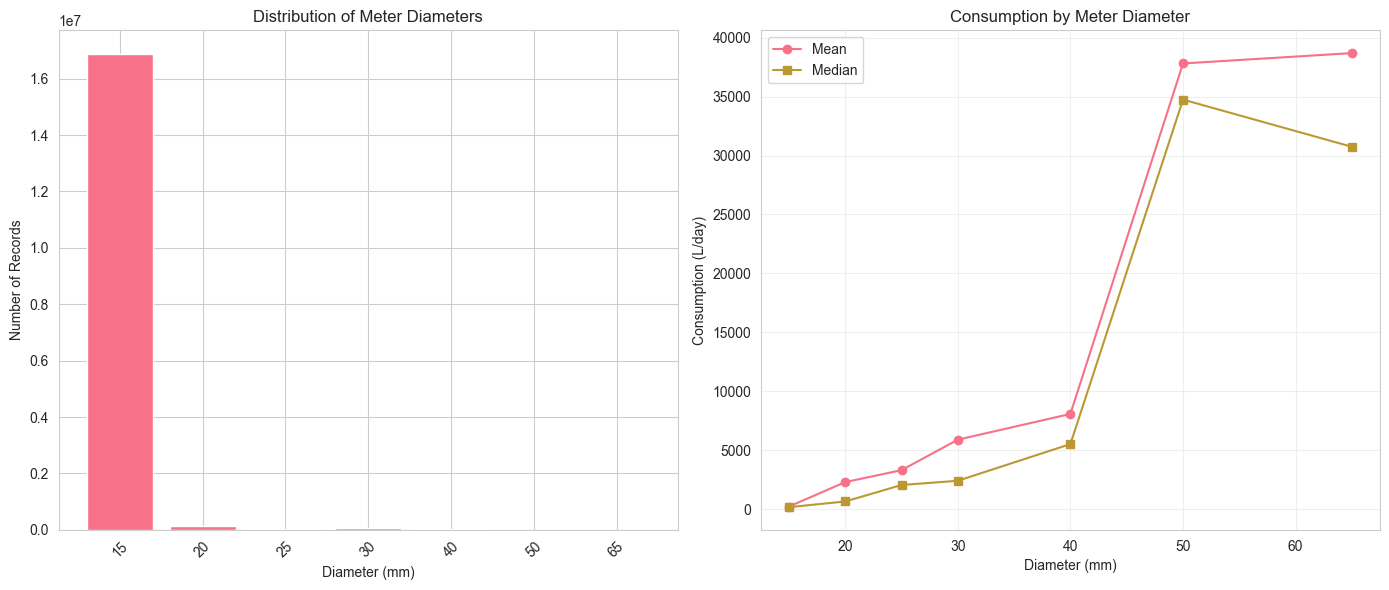

In [20]:
# Diameter analysis
diameter_stats = df['DIAM_COMP'].value_counts().sort_index()
print("Diameter Distribution:")
print("="*80)
print(diameter_stats)
print(f"\nUnique diameters: {df['DIAM_COMP'].nunique()}")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(diameter_stats.index.astype(str), diameter_stats.values)
axes[0].set_title('Distribution of Meter Diameters')
axes[0].set_xlabel('Diameter (mm)')
axes[0].set_ylabel('Number of Records')
axes[0].tick_params(axis='x', rotation=45)

# Consumption by diameter
diameter_consumption = df.groupby('DIAM_COMP')['CONSUMO_REAL'].agg(['mean', 'median']).reset_index()
axes[1].plot(diameter_consumption['DIAM_COMP'], diameter_consumption['mean'], marker='o', label='Mean')
axes[1].plot(diameter_consumption['DIAM_COMP'], diameter_consumption['median'], marker='s', label='Median')
axes[1].set_title('Consumption by Meter Diameter')
axes[1].set_xlabel('Diameter (mm)')
axes[1].set_ylabel('Consumption (L/day)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Meters with valid age data: 17,112,709
Age range: 0.01 to 13.96 years
Mean age: 5.92 years
Median age: 6.00 years


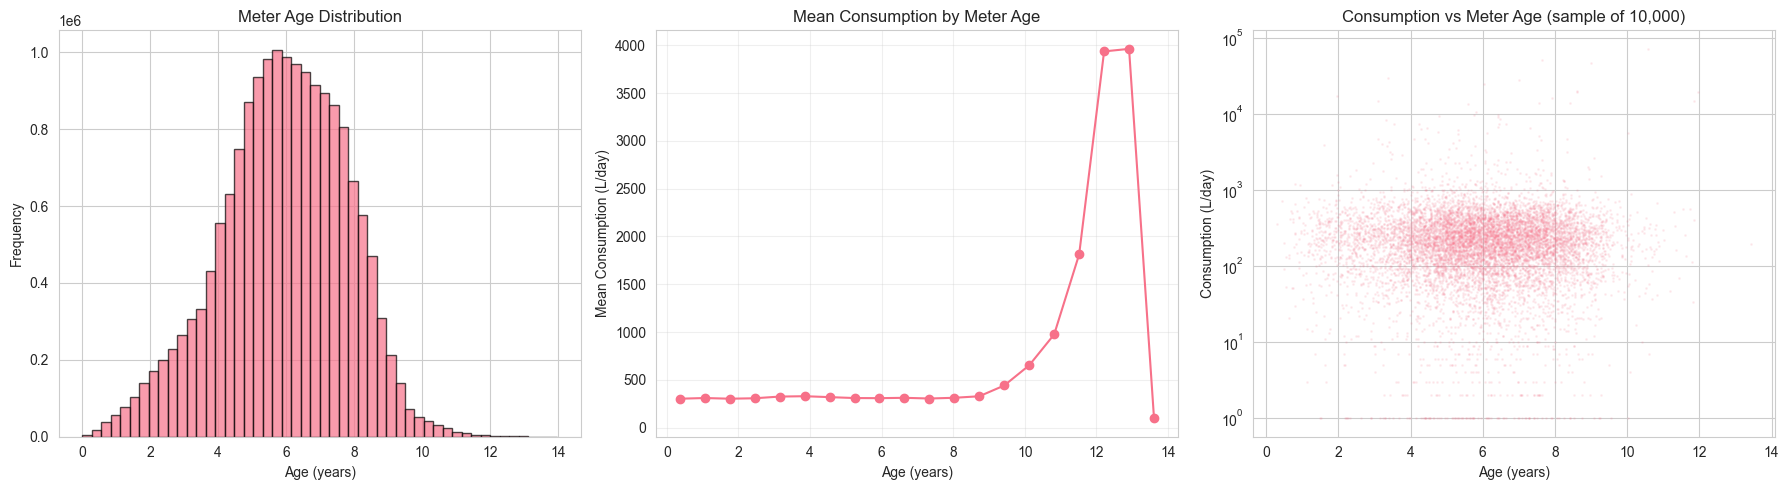

In [21]:
# Meter age analysis
age_df = df[df['METER_AGE'].notna() & (df['METER_AGE'] >= 0) & (df['METER_AGE'] <= 50)]

print(f"Meters with valid age data: {len(age_df):,}")
print(f"Age range: {age_df['METER_AGE'].min():.2f} to {age_df['METER_AGE'].max():.2f} years")
print(f"Mean age: {age_df['METER_AGE'].mean():.2f} years")
print(f"Median age: {age_df['METER_AGE'].median():.2f} years")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age distribution
axes[0].hist(age_df['METER_AGE'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Meter Age Distribution')
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Frequency')

# Consumption vs Age
age_bins = pd.cut(age_df['METER_AGE'], bins=20)
age_consumption = age_df.groupby(age_bins)['CONSUMO_REAL'].mean().reset_index()
age_consumption['Age_Mid'] = age_consumption['METER_AGE'].apply(lambda x: x.mid)

axes[1].plot(age_consumption['Age_Mid'], age_consumption['CONSUMO_REAL'], marker='o')
axes[1].set_title('Mean Consumption by Meter Age')
axes[1].set_xlabel('Age (years)')
axes[1].set_ylabel('Mean Consumption (L/day)')
axes[1].grid(True, alpha=0.3)

# Scatter plot (sample for performance)
sample_size = min(10000, len(age_df))
age_sample = age_df.sample(sample_size)
axes[2].scatter(age_sample['METER_AGE'], age_sample['CONSUMO_REAL'], alpha=0.1, s=1)
axes[2].set_title(f'Consumption vs Meter Age (sample of {sample_size:,})')
axes[2].set_xlabel('Age (years)')
axes[2].set_ylabel('Consumption (L/day)')
axes[2].set_yscale('log')

plt.tight_layout()
plt.show()


Unique brands: 4

Top 10 brands by record count:
MARCA_COMP
ITR    11127427
SPL     3276069
ZAR     2360952
IBE      348261
Name: count, dtype: int64

Unique models: 24

Top 10 models by record count:
CODI_MODEL
31    9935058
2     1945704
27    1393688
4     1334726
63     964328
46     606804
21     357545
73     194228
66     151124
48      66877
Name: count, dtype: int64

Unique brand-model combinations: 27

Top 10 brand-model combinations:
BRAND_MODEL
ITR::31    9935058
SPL::2     1941343
ZAR::27    1393688
SPL::4     1334726
ITR::63     964328
ZAR::46     606804
ZAR::21     337195
IBE::73     194228
IBE::66     151124
ITR::48      66877
Name: count, dtype: int64


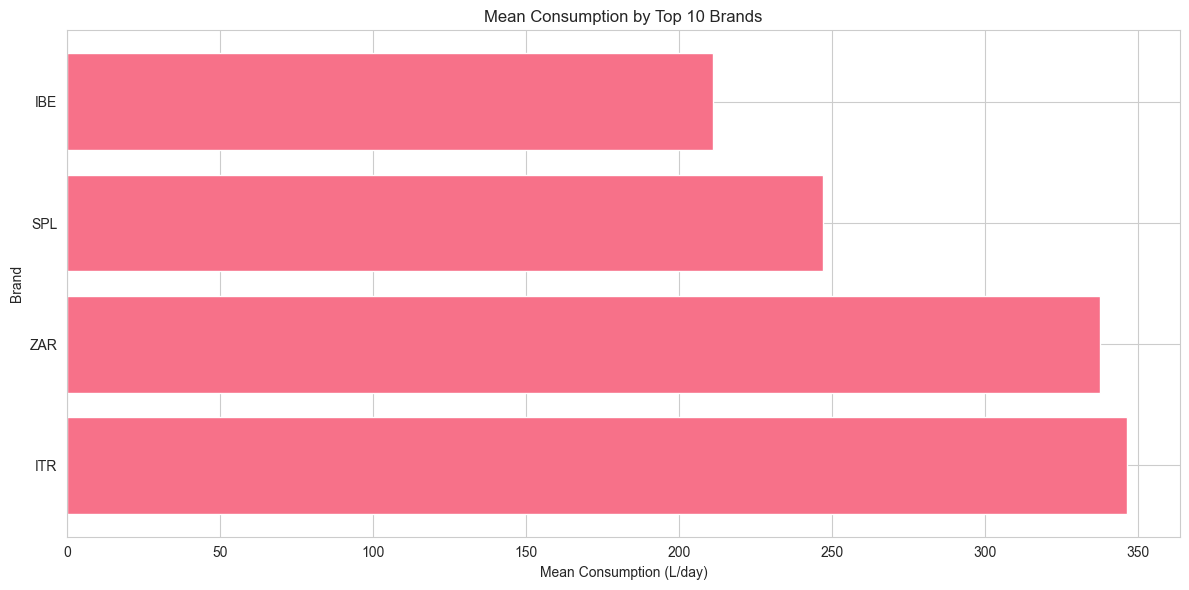

In [22]:
# Brand analysis
brand_dist = df['MARCA_COMP'].value_counts()
print(f"Unique brands: {df['MARCA_COMP'].nunique()}")
print(f"\nTop 10 brands by record count:")
print(brand_dist.head(10))

# Model analysis
model_dist = df['CODI_MODEL'].value_counts()
print(f"\nUnique models: {df['CODI_MODEL'].nunique()}")
print(f"\nTop 10 models by record count:")
print(model_dist.head(10))

# Brand-Model combination
df['BRAND_MODEL'] = df['MARCA_COMP'].astype(str) + '::' + df['CODI_MODEL'].astype(str)
brand_model_dist = df['BRAND_MODEL'].value_counts()
print(f"\nUnique brand-model combinations: {df['BRAND_MODEL'].nunique()}")
print(f"\nTop 10 brand-model combinations:")
print(brand_model_dist.head(10))

# Consumption by brand
if len(brand_dist) > 0:
    top_brands = brand_dist.head(10).index
    brand_consumption = df[df['MARCA_COMP'].isin(top_brands)].groupby('MARCA_COMP')['CONSUMO_REAL'].mean().sort_values(ascending=False)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.barh(brand_consumption.index.astype(str), brand_consumption.values)
    ax.set_title('Mean Consumption by Top 10 Brands')
    ax.set_xlabel('Mean Consumption (L/day)')
    ax.set_ylabel('Brand')
    plt.tight_layout()
    plt.show()


## 10. Correlation Analysis


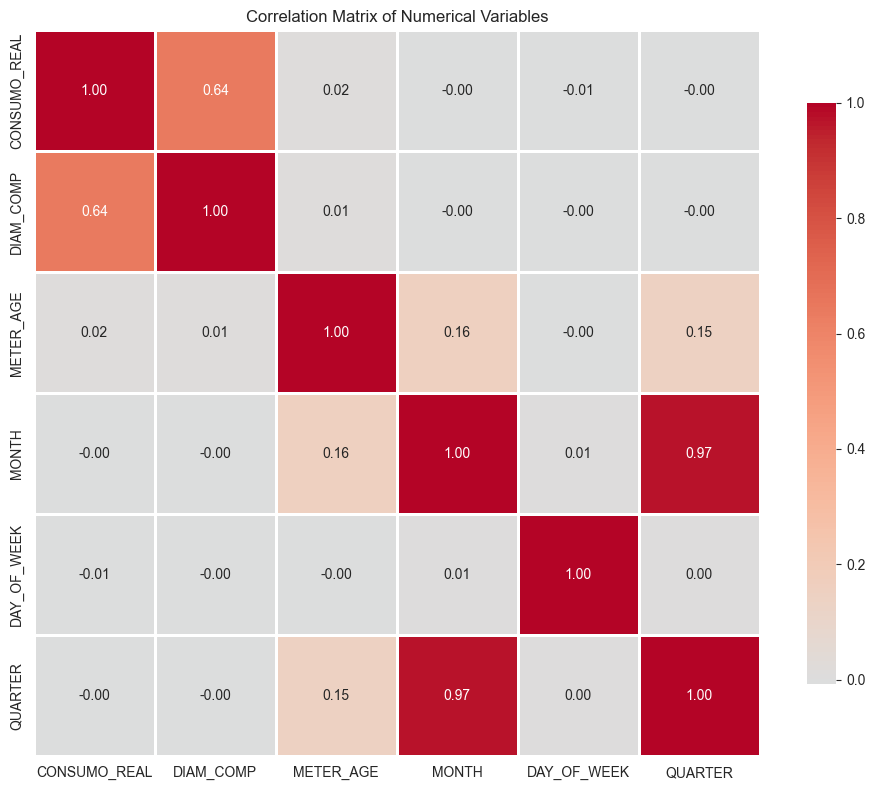

Correlation with Consumption:
CONSUMO_REAL    1.00
DIAM_COMP       0.64
METER_AGE       0.02
QUARTER        -0.00
MONTH          -0.00
DAY_OF_WEEK    -0.01
Name: CONSUMO_REAL, dtype: float64


In [23]:
# Select numerical columns for correlation
numerical_for_corr = df[['CONSUMO_REAL', 'DIAM_COMP', 'METER_AGE', 'MONTH', 'DAY_OF_WEEK', 'QUARTER']].copy()
correlation_matrix = numerical_for_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

print("Correlation with Consumption:")
print(correlation_matrix['CONSUMO_REAL'].sort_values(ascending=False))
